## CMPS 460 Machine Learning Project – Spring 2024.
### **Predicting House Prices**

Project Description:

In this project, our objective is to develop and evaluate predictive models for estimating house prices based on various factors such as square footage, number of bedrooms, bathrooms, location, and other relevant attributes. By leveraging machine learning algorithms, we aim to analyze how these features impact house prices and compare the performance of different models. The project involves collecting and preprocessing a dataset containing house-related information, including handling missing values, encoding categorical variables, and selecting relevant features. We will split the dataset into training and testing sets, train multiple machine learning models, and assess their performance using metrics like mean squared error (MSE) and F1-score. The ultimate goal is to deploy an accurate predictive model that provides insights into the factors driving house prices, benefiting stakeholders in the real estate industry.


### **2. Exploratory Data Analysis (EDA)**

• Perform exploratory data analysis to understand the structure, distributions, and relationships within the dataset.

• Produce insightful summary statistics and visualizations to draw relevant insights and identify potential patterns
or anomalies.

In [1]:
import pandas as pd
df = pd.read_csv('Housing.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Housing.csv'

In [ ]:
# Check the number of rows and columns
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Display the column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

Number of rows: 21613
Number of columns: 21

Column names and data types:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S', errors='coerce')

# Convert 'price' column to numeric format
df['price'] = pd.to_numeric(df['price'], errors='coerce')

print(df.dtypes)


id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
# Unique values and data distribution of 'date' and 'price' columns
print("Unique values in 'date' column:")
print(df['date'].unique())

print("\nUnique values in 'price' column:")
print(df['price'].unique())

Unique values in 'date' column:
<DatetimeArray>
['2014-10-13 00:00:00', '2014-12-09 00:00:00', '2015-02-25 00:00:00',
 '2015-02-18 00:00:00', '2014-05-12 00:00:00', '2014-06-27 00:00:00',
 '2015-01-15 00:00:00', '2015-04-15 00:00:00', '2015-03-12 00:00:00',
 '2015-04-03 00:00:00',
 ...
 '2015-03-08 00:00:00', '2014-08-30 00:00:00', '2015-05-27 00:00:00',
 '2015-03-22 00:00:00', '2015-02-15 00:00:00', '2014-10-11 00:00:00',
 '2015-02-01 00:00:00', '2014-11-30 00:00:00', '2014-08-24 00:00:00',
 '2014-07-27 00:00:00']
Length: 372, dtype: datetime64[ns]

Unique values in 'price' column:
[ 231300.  538000.  180000. ...  610685. 1007500.  402101.]


In [ ]:
#calculates the number of unique values for each column.
df.nunique()

id               21436
date               372
price             4029
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [ ]:
# to drop any duplicated data
df.drop_duplicates(inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# to understand the composition of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [ ]:
# the central tendency and spread of numerical columns in the DataFrame
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,2014-10-29 04:38:01.959931648,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876570e+09,NaN,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631



- Count: This row shows the number of non-null values for each attribute. For example, there are 21,613 non-null values for each attribute, indicating that there are no missing values in the dataset.

- Mean: This row displays the mean (average) value for each attribute. For instance, the mean price of houses is approximately $540,088.6.

- Standard Deviation (Std): This row represents the standard deviation, which measures the dispersion or variability of the values around the mean. A higher standard deviation indicates greater variability. For example, the standard deviation for house prices is approximately $367,126.8, suggesting that house prices vary considerably from the mean.

- Min: This row shows the minimum value observed for each attribute. For instance, the minimum number of bedrooms is 0, and the minimum price of a house is $75,000.

- 25th Percentile (25%): This row represents the value below which 25% of the data falls. It is also known as the first quartile. For example, 25% of the houses have a price below $321,950.

- 50th Percentile (50%) / Median: This row displays the median value for each attribute, which is the middle value when the data is sorted in ascending order. For example, the median price of houses is $450,000.

- 75th Percentile (75%): This row represents the value below which 75% of the data falls. It is also known as the third quartile. For instance, 75% of the houses have a price below $645,000.

- Max: This row shows the maximum value observed for each attribute. For example, the maximum number of bedrooms is 33, and the maximum price of a house is $7,700,000.


In [ ]:
# Use df.describe() on the 'date' column
date_description = df['date'].describe()
print(date_description)

count                            21613
mean     2014-10-29 04:38:01.959931648
min                2014-05-02 00:00:00
25%                2014-07-22 00:00:00
50%                2014-10-16 00:00:00
75%                2015-02-17 00:00:00
max                2015-05-27 00:00:00
Name: date, dtype: object


In [ ]:
# Calculating variance for each numeric column (excluding 'date')
numeric_columns = df.select_dtypes(include=['number']).columns  # numeric columns
numeric_columns = [col for col in numeric_columns if col != 'date']  # Exclude 'date' column

# Calculating variance for each numeric column
numeric_variability = df[numeric_columns].var()
print("Variance of each numeric column:")
print(numeric_variability)

Variance of each numeric column:
id               8.274654e+18
price            1.347821e+11
bedrooms         8.650956e-01
bathrooms        5.931513e-01
sqft_living      8.435337e+05
sqft_lot         1.715659e+09
floors           2.915880e-01
waterfront       7.485226e-03
view             5.872426e-01
condition        4.234665e-01
grade            1.381703e+00
sqft_above       6.857347e+05
sqft_basement    1.958727e+05
yr_built         8.627973e+02
yr_renovated     1.613462e+05
zipcode          2.862788e+03
lat              1.919990e-02
long             1.983262e-02
sqft_living15    4.697612e+05
sqft_lot15       7.455182e+08
dtype: float64


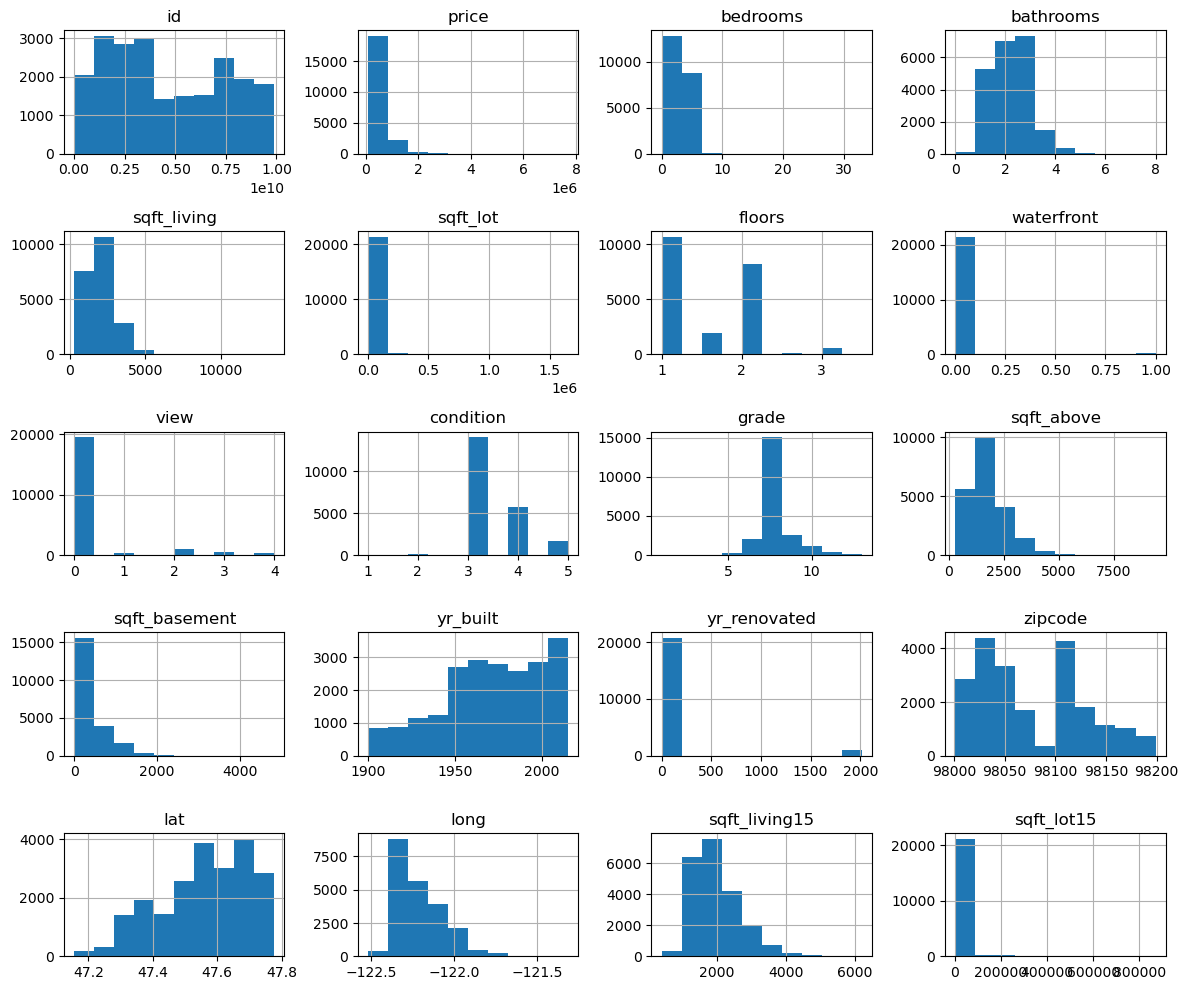

In [ ]:
# Plot histograms to provide a comprehensive visual summary of the distribution of a numeric variable
import matplotlib.pyplot as plt
import seaborn as sns
numeric_variables = df.select_dtypes(include=['int64', 'float64'])
numeric_variables.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

**Graph Analysis**

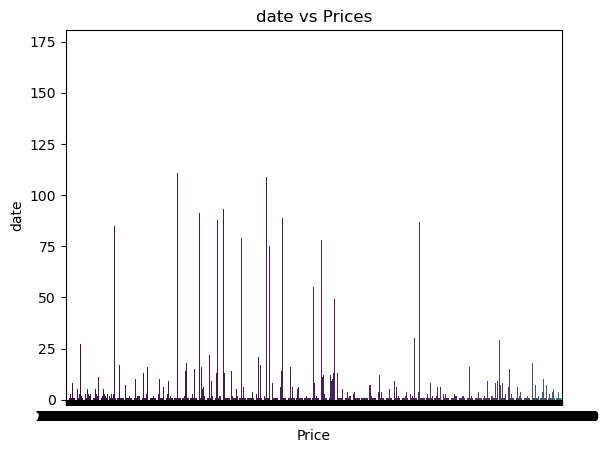

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot countplot with 'price' as hue
sns.countplot(x='price', data=df, hue='price', palette='viridis', legend=False)

# Set title and axis labels
plt.title('date vs Prices')
plt.xlabel('Price')
plt.ylabel('date')

# Show the plot
plt.show()


**Graph Analysis**

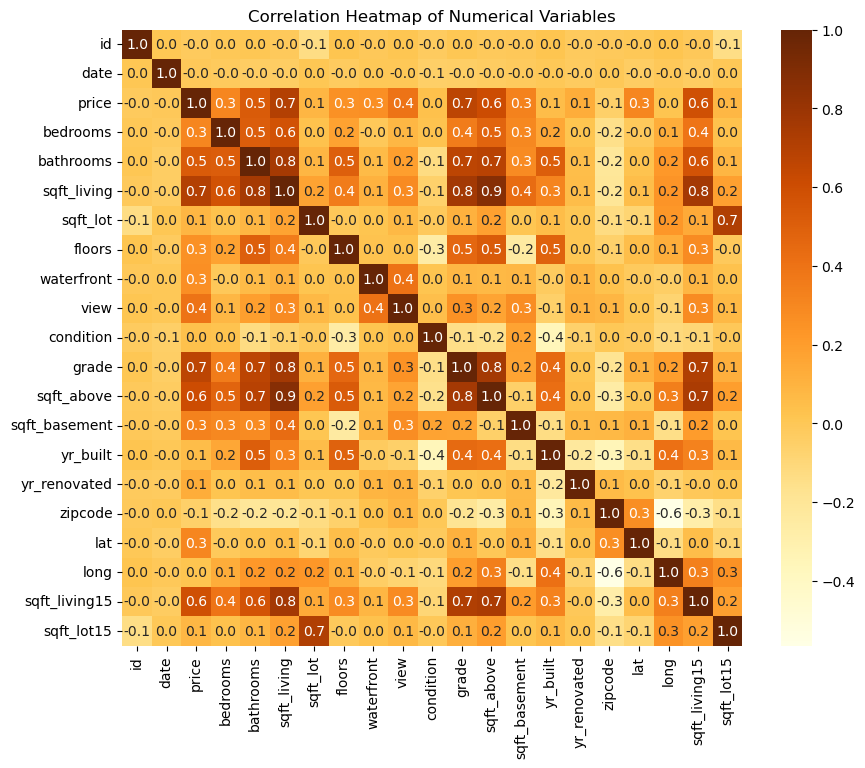

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix for numerical variables
correlation_matrix = df.corr()


# Plot the heatmap
sns.heatmap(correlation_matrix, cmap='YlOrBr', annot=True, fmt=".1f")

# Add title
plt.title('Correlation Heatmap of Numerical Variables')

# Show the plot
plt.show()


**Graph Analysis**
- Values close to 1 indicate a strong positive correlation (variables increase together).
- Values close to -1 indicate a strong negative correlation (one variable increases while the other decreases).
- Values close to 0 indicate little to no correlation between variables. modify this code to show with date values

### **3. Data Cleaning and Preprocessing**

- **Address Missing Values:** From part 2 in the "count" row of the EDA , we can see that there are no missing values in any of the columns, as all columns have 21,613 non-null entries. Therefore, we can skip imputation for missing values in this dataset.

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df_cleaned = df.dropna()
print(df_cleaned)

               id       date     price  bedrooms  bathrooms  sqft_living  \
0      7229300521 2014-10-13  231300.0         2       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650   

- **Handle Outliers:** We can use the statistics provided under the "mean," "std," "min," "25%," "50%," and "75%" rows to identify potential outliers in numerical columns.

In [ ]:

def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    return column[(column >= lower_limit) & (column <= upper_limit)]
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Apply outlier removal function to each numeric column
df_no_outliers = df[numeric_columns].apply(remove_outliers_iqr)

# Remove rows with all NaN values after outlier removal
df_no_outliers.dropna(axis=0, how='all', inplace=True)

# Display the resulting DataFrame without outliers and NaN values
print(df_no_outliers)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      231300.0       2.0       1.00       1180.0    5650.0     1.0   
1      538000.0       3.0       2.25       2570.0    7242.0     2.0   
2      180000.0       2.0       1.00        770.0   10000.0     1.0   
3      604000.0       4.0       3.00       1960.0    5000.0     1.0   
4      510000.0       3.0       2.00       1680.0    8080.0     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0       3.0       2.50       1530.0    1131.0     3.0   
21609  400000.0       4.0       2.50       2310.0    5813.0     2.0   
21610  402101.0       2.0       0.75       1020.0    1350.0     2.0   
21611  400000.0       3.0       2.50       1600.0    2388.0     2.0   
21612  325000.0       2.0       0.75       1020.0    1076.0     2.0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0            3.0    7.0      1180.0            0.0      1955         

In [ ]:
print(df.isnull().sum())


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


- **Investigate relationships and correlations between attributes to inform feature engineering decisions**


From the heatmap, we can observe that:

 1. The id and date columns have no correlation with any other numerical columns, as expected.
 2. The price column has a moderate positive correlation with sqft_living, sqft_above, sqft_basement, and sqft_living15, indicating that larger houses tend to have higher prices.
3. The price column has a weak positive correlation with bedrooms, bathrooms, floors, and view, suggesting that more bedrooms, bathrooms, floors, and a view can slightly increase the house price.
4. The condition and grade columns have a weak positive correlation with price, indicating that better condition and higher grades are associated with higher prices.
5. The sqft_living, sqft_above, and sqft_basement columns have strong positive correlations with each other, as they represent different aspects of the house's living space. 
6. The sqft_lot and sqft_lot15 columns have a weak positive correlation with price, suggesting that larger lots tend to have higher prices, but the correlation is not very strong.
7. The yr_built and yr_renovated columns have weak negative correlations with price, indicating that newer houses tend to have higher prices. However, this correlation is not very strong.

Based on these insights, we consider the following feature engineering decisions:

1. Focus on square footage features ('sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15') as they have moderate to strong correlations with price.
2. Potentially combine or transform features to capture the relationships more effectively, such as creating a 'total_sqft' feature by summing 'sqft_above', 'sqft_basement', and 'sqft_living'.
3. Consider the impact of bedrooms, bathrooms, floors, view, condition, and grade on house prices, even though their correlations are relatively weak.

**<span style="color:#a3c8f5">Create a new feature 'total_sqft' by summing 'sqft_above', 'sqft_basement', and 'sqft_living':</span>**


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('housing.csv')

# Exclude rows with missing values
df = df.dropna()

# Create a boolean mask for categorical columns
mask = df.dtypes == 'object'

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=df.columns[mask], drop_first=True)

# Create a new feature 'total_sqft' by summing 'sqft_above', 'sqft_basement', and 'sqft_living'
df['total_sqft'] = df['sqft_above'] + df['sqft_basement'] + df['sqft_living']

# Apply logarithmic or square root transformations to features with skewed distributions
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_sqft_above'] = np.log(df['sqft_above'])
df['log_sqft_basement'] = np.log(df['sqft_basement'])
df['log_sqft_living15'] = np.log(df['sqft_living15'])
df['sqrt_sqft_living'] = df['sqft_living'] ** 0.5
df['sqrt_sqft_above'] = df['sqft_above'] ** 0.5
df['sqrt_sqft_basement'] = df['sqft_basement'] ** 0.5
df['sqrt_sqft_living15'] = df['sqft_living15'] ** 0.5

# Create a correlation matrix
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()['price'].abs()

# Select features with moderate to strong correlations
selected_features = correlation_matrix[correlation_matrix > 0.3].index.tolist()

# Print the selected features
print("Selected features: ", selected_features)
#This will give you the list of selected features that have moderate to strong correlations with the price.


Selected features:  ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'total_sqft', 'log_sqft_living', 'log_sqft_above', 'log_sqft_basement', 'log_sqft_living15', 'sqrt_sqft_living', 'sqrt_sqft_above', 'sqrt_sqft_living15']


c:\Users\sa190\anaconda3\envs\cmps460\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


- **Spliting Data into Testing and Traning Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer

# Assuming y is your target variable
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))
y = pd.Series(y_imputed.flatten(), index=y.index)


- **Maintaine Class Balance Using Stratified Sampling**

In [ ]:
# Merge rare classes into a single category
y[y.isin(y.value_counts()[y.value_counts() == 1].index)] = 'Other'

C:\Users\sa190\AppData\Local\Temp\ipykernel_18976\24339641.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  y[y.isin(y.value_counts()[y.value_counts() == 1].index)] = 'Other'


In [ ]:
y = pd.to_numeric(y, errors='coerce')


In [ ]:
y.value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
407450.0       2
639900.0       2
1445000.0      2
827000.0       2
769995.0       2
Name: count, Length: 1632, dtype: int64

In [ ]:
y = y.dropna()
print(y.isnull().sum())


0


In [ ]:
# Align X with cleaned y
X = X.loc[y.index]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, stratify=y)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3843, 399)
X_test shape: (15373, 399)
y_train shape: (3843,)
y_test shape: (15373,)


In [ ]:
# Check class distribution in y_train
print("Class Distribution in y_train:")
print(y_train.value_counts(normalize=True))

# Check class distribution in y_test
print("\nClass Distribution in y_test:")
print(y_test.value_counts(normalize=True))

Class Distribution in y_train:
450000.0    0.008847
350000.0    0.008847
550000.0    0.008327
425000.0    0.007806
325000.0    0.007806
              ...   
399500.0    0.000260
921000.0    0.000260
333500.0    0.000260
568500.0    0.000260
799950.0    0.000260
Name: proportion, Length: 1259, dtype: float64

Class Distribution in y_test:
450000.0     0.008977
350000.0     0.008977
550000.0     0.008261
500000.0     0.007936
425000.0     0.007806
               ...   
535500.0     0.000065
3800000.0    0.000065
1410000.0    0.000065
285950.0     0.000065
1037000.0    0.000065
Name: proportion, Length: 1632, dtype: float64
